## <span style="color:lightblue"> **Problem Statement 1:** </span>
The data (sample) were collected in São Paulo - Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age (average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption based on the features that contain climate conditions.

**Dataset Description**
- Data: date of the record
- Temperatura Media (C): Average temperature of the day in celsius
- Temperatura Minima (C): Minimum temperature of the day in celsius
- Temperatura Maxima (C): Maximum temperature of the day in celsius
- Precipitacao (mm): Percipitation in mm
- Final de Semana: If the day is the weekend or not
- Consumo de cerveja (litros): Beer consumption in liters

I would be writing python code to perform the following tasks mentioned:
1. Load the dataset, check its shape
2. Rectify the data of the first four columns
   **Hint:** Check columns 'Temperatura Media(C)', 'Temperatura Minima (C)', 'Temperatura Maxima (C)' and 'Precipitacao'<br>
   Fix the following errors present in these features
3. Create new features using the 'Data' feature and the make 'Data' column as index<br>
    **Hint:** Create a new feature 'Month' from the dates, consisting of the month of the year.<br>
    Create a new feature 'Day' from the dates, consisting of the day of the week.
    Set values from the 'Data' column as indexes. Use code snippet:
    `df1.set_index('Data', inplace=True)`
4. Handle null and duplicate values
5. Check the data type of the features and convert them to the appropriate data type
6. Analyse features with outlier values
7. Plot and analyze the correlation
8. Split the datast for training and testing
9. Train a linear regression model and print the intercept and coefficients
10. Evaluate the model using the R2 score, mean absolute error and root mean squared error

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('Display.max_columns', None)
pd.set_option('Display.max_rows', None)

#Needed libraries
import datetime
import math


#scikit learn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
#task1 Load the dataset and check it's shape
beer_df = pd.read_csv("./../Assignment_files/Consumo_cerveja_ass4.csv", parse_dates=['Data'] )
beer_df.shape

(941, 7)

In [3]:
beer_df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                  object
Temperatura Minima (C)                 object
Temperatura Maxima (C)                 object
Precipitacao (mm)                      object
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [4]:
#task2: Rectifying the data of the first four columns
for column in beer_df.columns:
    if beer_df[column].dtype == 'object':
        beer_df[column] = beer_df[column].str.replace(',', '.')
        beer_df[column] = beer_df[column].astype(dtype='float64')
beer_df.dtypes

Data                           datetime64[ns]
Temperatura Media (C)                 float64
Temperatura Minima (C)                float64
Temperatura Maxima (C)                float64
Precipitacao (mm)                     float64
Final de Semana                       float64
Consumo de cerveja (litros)           float64
dtype: object

In [5]:
beer_df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [6]:
#Task3: creating new features using the 'Date' feature and make the 'Date' columns as index
# Creating a new feature 'Month' From the dates, consisting of the month of the year
beer_df["Month"] = pd.DatetimeIndex(beer_df['Data']).month
# Creating a new feature 'Day' from the dates, consisting of the day of the week.
beer_df["Day"] = pd.DatetimeIndex(beer_df["Data"]).day_of_week

# setting the values from the 'Data' columns as indexes
beer_df.set_index("Data", inplace=True)
beer_df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,0.0


In [7]:
#Handling  null and duplicate values
beer_df.duplicated().sum()

575

Dropping the duplicated entries(deleting them)

In [8]:
beer_df.drop_duplicates(inplace=True)

beer_df.duplicated().sum(), beer_df.isna().sum()

(0,
 Temperatura Media (C)          1
 Temperatura Minima (C)         1
 Temperatura Maxima (C)         1
 Precipitacao (mm)              1
 Final de Semana                1
 Consumo de cerveja (litros)    1
 Month                          1
 Day                            1
 dtype: int64)

In [9]:
beer_df

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros),Month,Day
Data,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,1.0,3.0
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,1.0,4.0
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,1.0,5.0
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,1.0,6.0
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,1.0,0.0
2015-01-06,23.78,20.1,30.5,12.2,0.0,28.218,1.0,1.0
2015-01-07,24.00,19.5,33.7,0.0,0.0,29.732,1.0,2.0
2015-01-08,24.90,19.5,32.8,48.6,0.0,28.397,1.0,3.0
2015-01-09,28.20,21.9,34.0,4.4,0.0,24.886,1.0,4.0


Since there is only one missing row of data I will drop the missing values

In [10]:
beer_df.dropna(axis=0, inplace=True)
beer_df.isna().sum(), f'the number of duplicated entries: {beer_df.duplicated().sum()}'

(Temperatura Media (C)          0
 Temperatura Minima (C)         0
 Temperatura Maxima (C)         0
 Precipitacao (mm)              0
 Final de Semana                0
 Consumo de cerveja (litros)    0
 Month                          0
 Day                            0
 dtype: int64,
 'the number of duplicated entries: 0')

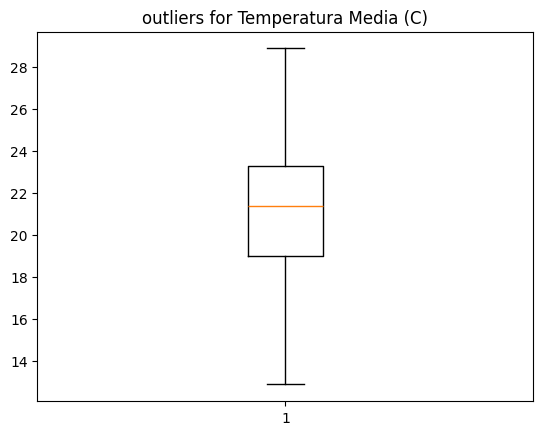

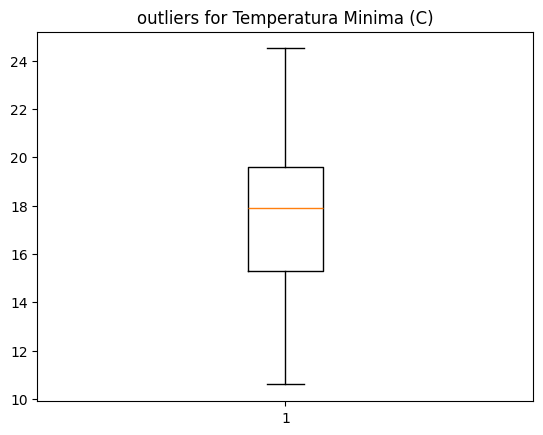

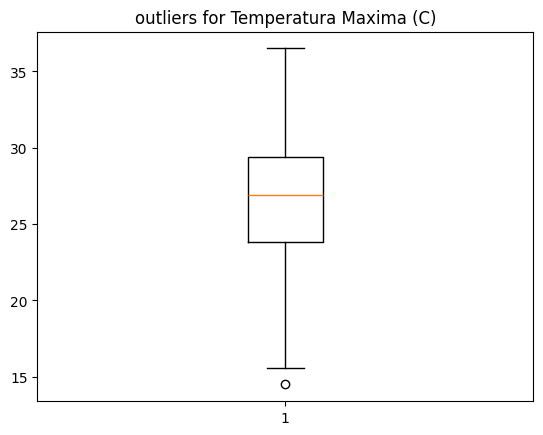

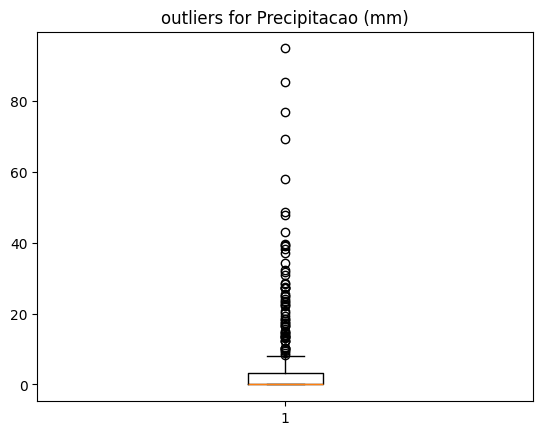

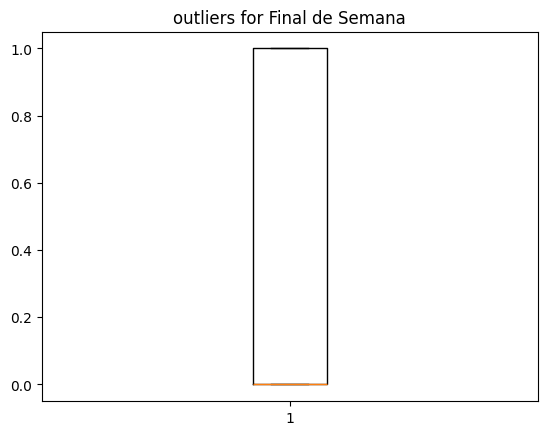

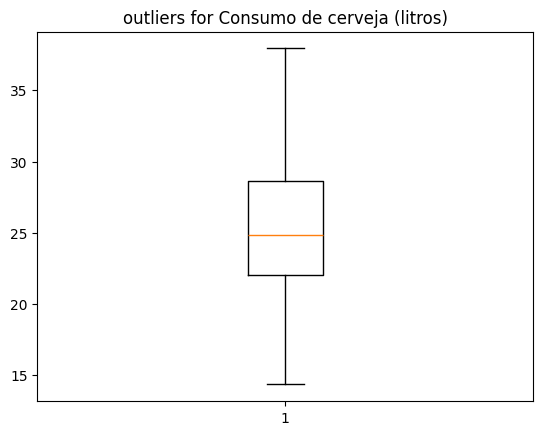

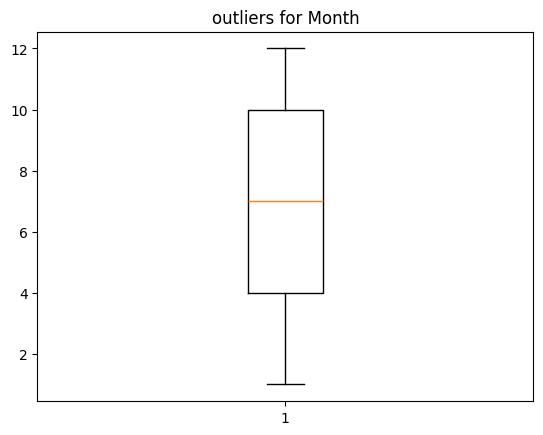

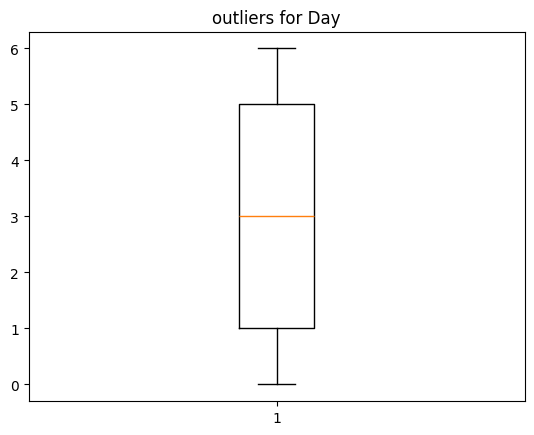

In [11]:
#detecting outliers
for column in beer_df.columns:
    fig, ax = plt.subplots()
    ax.boxplot(beer_df[column])
    ax.set_title(f"outliers for {column}")


The 'Precipitacao (mm)' Column has a lot of outliers 

In [12]:
#standardizing the Precipitacao column
scaler = StandardScaler()
testing_df = beer_df.copy()


In [35]:
X = testing_df.drop("Consumo de cerveja (litros)", axis=1)
y = testing_df["Consumo de cerveja (litros)"]

np.random.seed(16)
#Scaling the columns....
for column in X.columns:
    scale = scaler.fit(testing_df[[column]])
    testing_df[column] = scale.transform(testing_df[[column]])

#spliting the data into trainin and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#initializing the model to be used
lin_reg = LinearRegression().fit(X_train, y_train)

y_preds = lin_reg.predict(X_test)
r2 = r2_score(y_test, y_preds)
mse = mean_absolute_error(y_test, y_preds)
rmse = math.sqrt(mean_squared_error(y_test, y_preds))

r2, mse, rmse

(0.7054594662928996, 1.9876299108365654, 2.244341113741742)

In [36]:
lin_reg.coef_, lin_reg.intercept_

(array([-0.29738657,  0.27188573,  3.00809604, -0.69438551,  2.30729765,
         0.41818564,  0.00393209]),
 25.465937601457494)